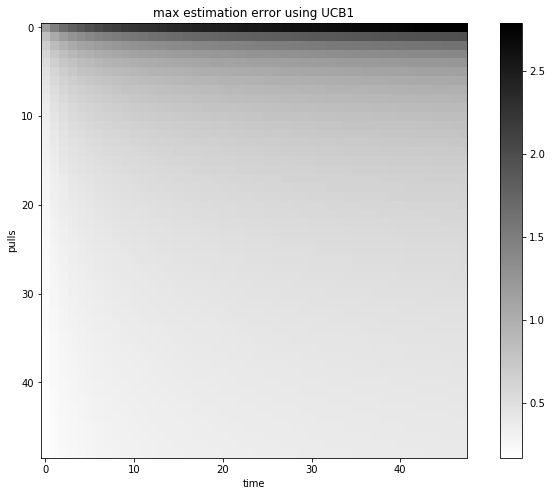

In [39]:
#Dependencies
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)

maxr = +1.0
minr = -1.0
ampl = maxr - minr

# linear means for each arm
k = 10
means = np.linspace(minr, maxr, k)
#idx = np.argsort(means)[::-1] #get order
#means = np.sort(means)[::-1]  #make it ordered

#gaussian approximation for the error, independent of the estimated mean, which is on the interval [0, 1]
#time vs number of trials
T = range(2, 50)
N = range(1, 50)
#ucb1_error
V = [[np.sqrt(2*np.log(t)/n) for t in T] for n in N]

plt.imshow(V, cmap=cm.gray_r)
plt.xlabel('time')
plt.ylabel('pulls')
plt.title('max estimation error using UCB1')
plt.colorbar()
plt.show()

# Hoeffding's inequality
## General case bounded on $[-1, 1]$

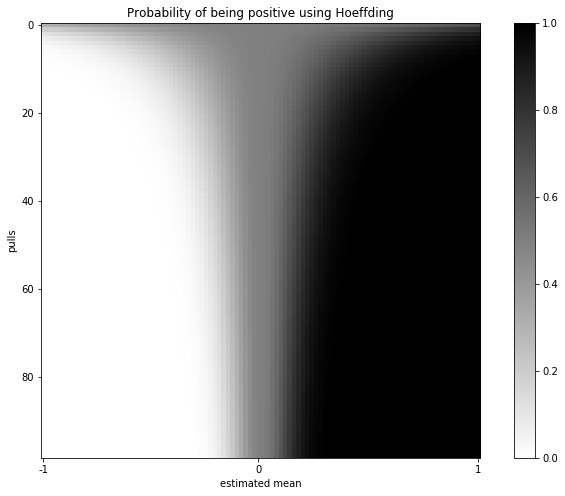

In [78]:
est_means = np.linspace(-1, 1, 100)
N = range(1, 100)

prob_posit = [[1/2*np.exp(-(2.0 * n**2.0 * mue**2.0) / (n * ampl**2)) if mue <=0 else 1-1/2*np.exp(-(2.0 * n**2.0 * mue**2.0) / (n * ampl**2)) for mue in est_means] for n in N]

plt.imshow(prob_posit, cmap=cm.gray_r)
plt.xlabel('estimated mean')
plt.xticks([0, 49, 99], [-1, 0, 1])
plt.ylabel('pulls')
plt.title('Probability of being positive using Hoeffding')
plt.colorbar()
plt.show()


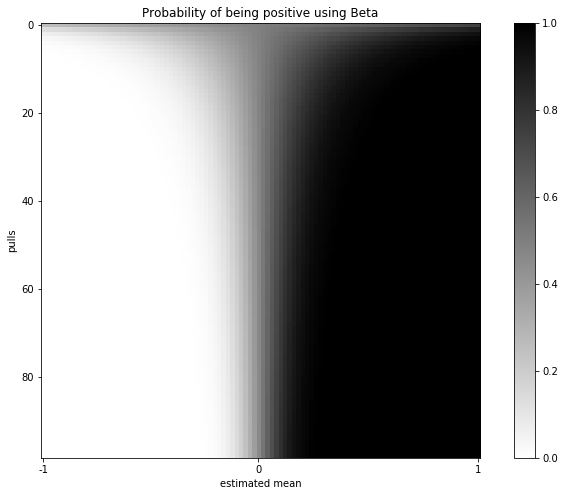

In [79]:
from scipy.stats import beta

N = range(1, 100)
est_p = np.linspace(0, 1, 100)

prob_posit = [[beta.cdf(0.5, n-n*p+1, n*p+1) for p in est_p] for n in N]

plt.imshow(prob_posit, cmap=cm.gray_r)
plt.xlabel('estimated mean')
plt.xticks([0, 49, 99], [-1, 0, 1])
plt.ylabel('pulls')
plt.title('Probability of being positive using Beta')
plt.colorbar()
plt.show()